In [56]:
import pandas as pd

In [57]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rc

# 노트북 안에 그래플 그리기 위해 셋팅
%matplotlib inline

# 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해
mpl.rcParams["axes.unicode_minus"] = False

In [58]:
train = pd.read_csv("train.csv")

In [59]:
train.shape

(891, 12)

In [60]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [61]:
test = pd.read_csv("test.csv")

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [63]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
import missingno as msno


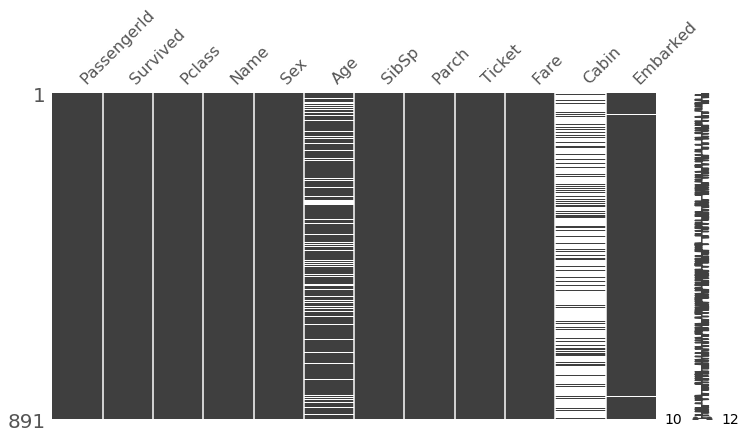

In [65]:
msno.matrix(train, figsize=(12,6))

In [66]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [67]:
train.Survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [68]:
train["Survived"].head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [69]:
train.loc[1]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

In [70]:
def bar_chart(feature, ax=None):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, ax=ax)

[Text(0.5,1,'성별 생사 정보')]

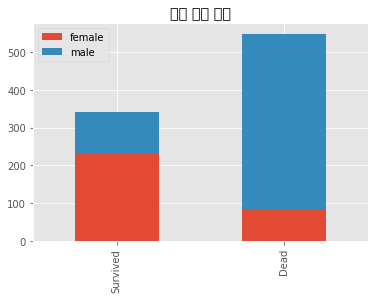

In [71]:
figure, ax = plt.subplots(ncols=1, nrows=1)
figure.set_size_inches(6,4)

bar_chart("Sex", ax)

ax.set(title="성별 생사 정보")

In [72]:
def get_probality(feature):
    Survived = train[train["Survived"]==1][feature].value_counts()
    Dead = train[train["Survived"]==0][feature].value_counts()
    total = Survived + Dead
    print("살아남은 확률: \n{} \n 죽은 확률: \n{}".format(Survived/total, Dead/total))


In [73]:
get_probality("Sex")

살아남은 확률: 
female    0.742038
male      0.188908
Name: Sex, dtype: float64 
 죽은 확률: 
female    0.257962
male      0.811092
Name: Sex, dtype: float64


In [74]:
def count_plot(column, ax):
    sns.countplot(x=column, hue='Survived', data=train, ax=ax)

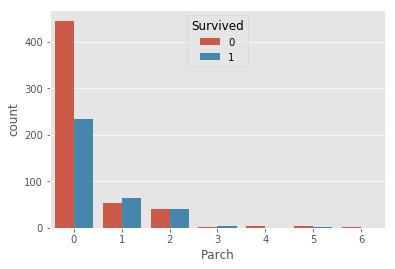

In [75]:
figure, ax = plt.subplots(ncols=1, nrows=1)
figure.set_size_inches(6,4)

count_plot("Parch", ax)

[Text(0.5,1,'승선 장소')]

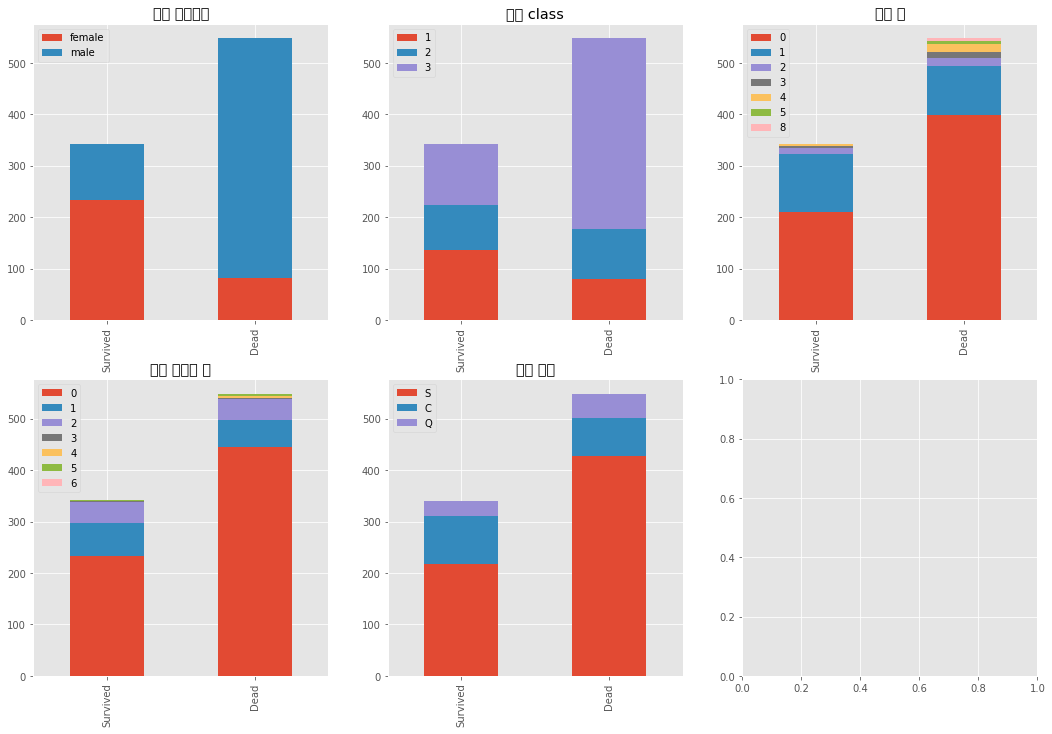

In [76]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

bar_chart('Sex', ax1)
bar_chart('Pclass', ax2)
bar_chart('SibSp', ax3)
bar_chart('Parch', ax4)
bar_chart('Embarked', ax5)

ax1.set(title="성별 생사정보")
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식의 수")
ax5.set(title="승선 장소")

[Text(0.5,1,'승선 장소')]

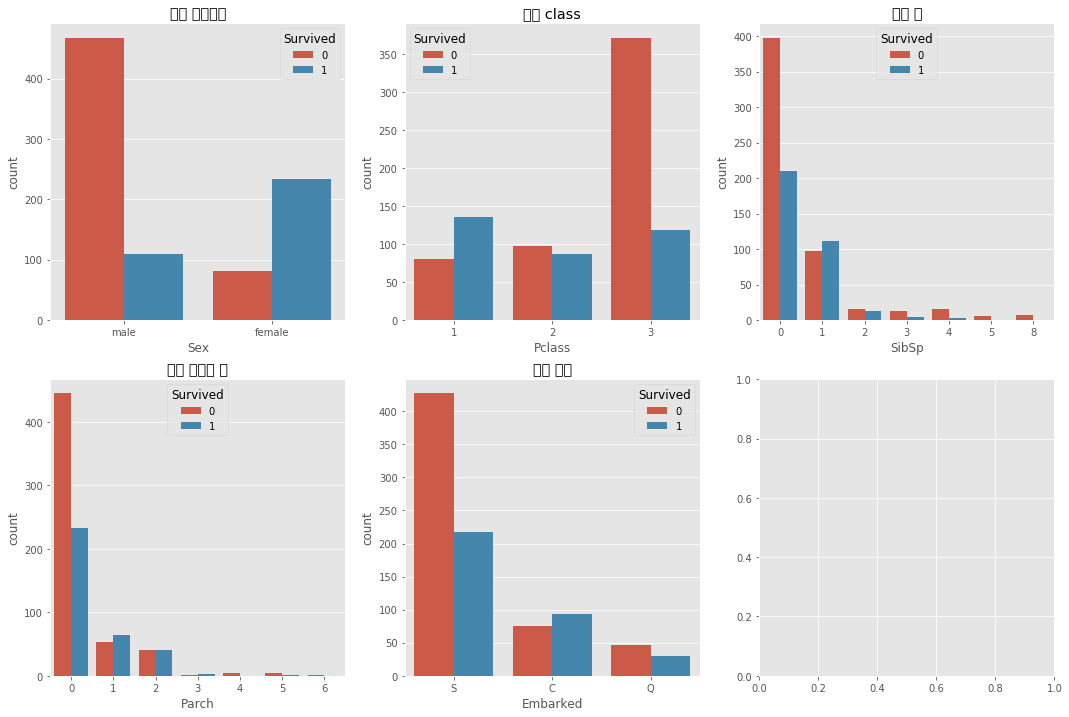

In [77]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

count_plot('Sex', ax1)
count_plot('Pclass', ax2)
count_plot('SibSp', ax3)
count_plot('Parch', ax4)
count_plot('Embarked', ax5)

ax1.set(title="성별 생사정보")
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식의 수")
ax5.set(title="승선 장소")

In [78]:
features = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
for feature in features:
    get_probality(feature)

살아남은 확률: 
female    0.742038
male      0.188908
Name: Sex, dtype: float64 
 죽은 확률: 
female    0.257962
male      0.811092
Name: Sex, dtype: float64
살아남은 확률: 
1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64 
 죽은 확률: 
1    0.370370
2    0.527174
3    0.757637
Name: Pclass, dtype: float64
살아남은 확률: 
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: SibSp, dtype: float64 
 죽은 확률: 
0    0.654605
1    0.464115
2    0.535714
3    0.750000
4    0.833333
5         NaN
8         NaN
Name: SibSp, dtype: float64
살아남은 확률: 
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
Name: Parch, dtype: float64 
 죽은 확률: 
0    0.656342
1    0.449153
2    0.500000
3    0.400000
4         NaN
5    0.800000
6         NaN
Name: Parch, dtype: float64
살아남은 확률: 
S    0.336957
C    0.553571
Q    0.389610
Name: Embarked, dtype: float64 
 죽은 확률: 
S    0.663043
C    0.446429
Q    0.610390
Name: Embar

In [79]:
# contious 한 데이터 column 의 시각화
def draw_facetgrid(feature):
    facet = sns.FacetGrid(train, hue="Survived", aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, train[feature].max()))
    # survived 라벨을 표시.
    facet.add_legend() 
    plt.show()

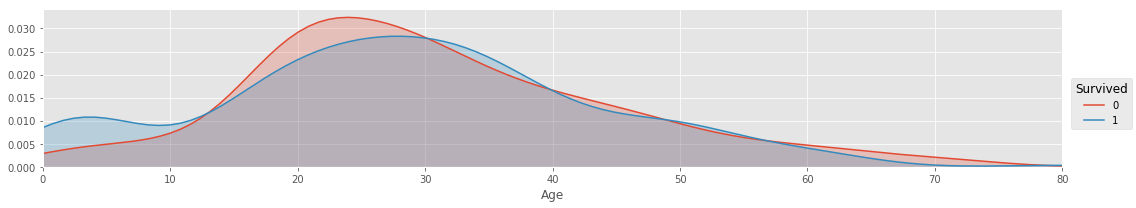

In [80]:
draw_facetgrid("Age")

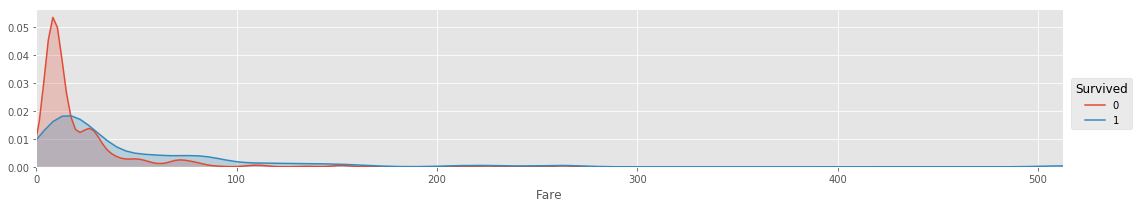

In [81]:
draw_facetgrid("Fare")

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [84]:
def drop_columns(feature):
    train.drop(feature, axis=1, inplace=True)
    test.drop(feature, axis=1, inplace=True)

In [85]:
drop_columns("Cabin")

In [86]:
drop_columns("Ticket")

In [87]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S


In [88]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q


In [89]:
test_train_data = [train, test]

In [90]:
train["Name"].value_counts()

Andrews, Miss. Kornelia Theodosia                                                     1
Yousif, Mr. Wazli                                                                     1
Rommetvedt, Mr. Knud Paust                                                            1
Barber, Miss. Ellen "Nellie"                                                          1
Goodwin, Mrs. Frederick (Augusta Tyler)                                               1
Barton, Mr. David John                                                                1
Dakic, Mr. Branko                                                                     1
Moran, Mr. Daniel J                                                                   1
Sheerlinck, Mr. Jan Baptist                                                           1
Yousseff, Mr. Gerious                                                                 1
Jalsevac, Mr. Ivan                                                                    1
Chip, Mr. Chang                 

In [91]:
for dataset in test_train_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [92]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,Mr


In [93]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Lady          1
Mme           1
Don           1
Jonkheer      1
Countess      1
Capt          1
Sir           1
Ms            1
Name: Title, dtype: int64

In [94]:
drop_columns("Name")

In [95]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.25,S,Mr


In [96]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 0, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 2, "Lady": 2, "Jonkheer": 1, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 0 }

for dataset in test_train_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)



In [97]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.25,S,0


In [98]:
sex_mapping = {"male": 0 , "female":1}

for dataset in test_train_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [99]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.25,S,0


In [100]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [101]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64

In [102]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.328713
2,"(32.252, 48.168]",0.436893
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [103]:
for dataset in test_train_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 0.5,
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 1.5,
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 2

In [104]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,0,0.5,1,0,7.25,S,0,"(16.336, 32.252]"


In [105]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,1.0,0,0,7.8292,Q,0


In [107]:
train.drop("AgeBand", axis=1, inplace=True)

In [108]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,0.5,1,0,7.25,S,0


In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB


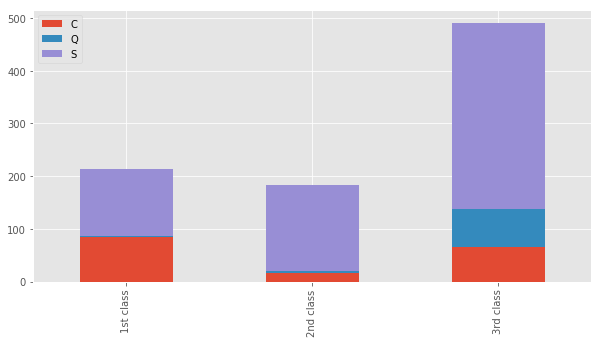

In [110]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [112]:
for dataset in test_train_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [113]:
train["FareBand"] = pd.cut(train["Fare"], 5)
train[["FareBand", "Survived"]].groupby("FareBand", as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 102.466]",0.361575
1,"(102.466, 204.932]",0.757576
2,"(204.932, 307.398]",0.647059
3,"(307.398, 409.863]",NaN
4,"(409.863, 512.329]",1.000000


In [115]:
for dataset in test_train_data:
    dataset.loc[ dataset['Fare'] <= 102, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 102) & (dataset['Fare'] <= 204), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 204) & (dataset['Fare'] <= 307), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 307, 'Fare'] = 3

In [116]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand
0,1,0,3,0,0.5,1,0,0.0,S,0,"(-0.512, 102.466]"


In [117]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,1.0,0,0,0.0,Q,0


In [118]:
train.drop("FareBand", axis=1, inplace=True)

In [119]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,0.5,1,0,0.0,S,0


In [120]:
mapping_data ={"S":0, "Q":1, "C":2}

for dataset in test_train_data:
    dataset["Embarked"] = dataset["Embarked"].map(mapping_data)

In [121]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,0.5,1,0,0.0,0,0


(0, 11.0)

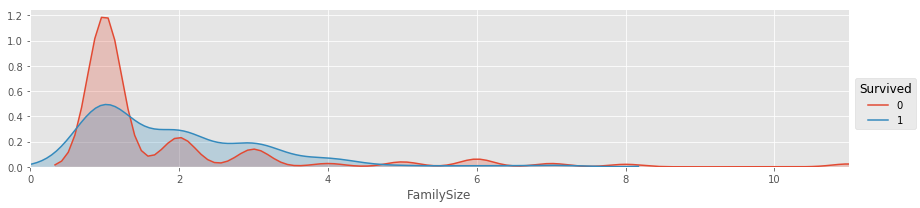

In [122]:
train["FamilySize"] = train["SibSp"] + train["Parch"] +1
test["FamilySize"] = test["SibSp"] + test["Parch"] +1

facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [125]:
train["FamilySize"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [126]:
test["FamilySize"].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [128]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in test_train_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [129]:
drop_columns("SibSp")
drop_columns("Parch")

In [130]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,0,0.5,0.0,0,0,0.4


In [131]:
test.head(1)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,1.0,0.0,1,0,0.0


In [132]:
droped_data =["Survived", "PassengerId"]
train_data = train.drop(droped_data, axis=1)

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

target = train["Survived"]

In [134]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [135]:
clf = KNeighborsClassifier(n_neighbors=11)
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)

print(round(np.mean(score)*100,2))

[0.78888889 0.82022472 0.7752809  0.80898876 0.80898876 0.7752809
 0.76404494 0.80898876 0.80898876 0.79775281]
79.57


In [136]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[0.84444444 0.80898876 0.75280899 0.80898876 0.84269663 0.78651685
 0.79775281 0.79775281 0.80898876 0.7752809 ]
80.24


In [148]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [146]:
test["Fare"].fillna(0.0, inplace=True)

In [147]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
FamilySize     0
dtype: int64